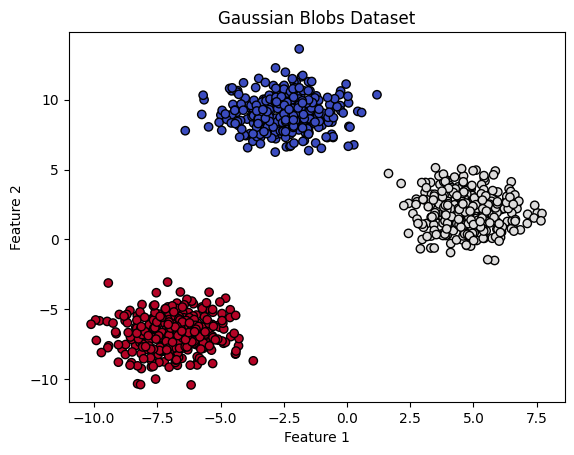

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tạo dữ liệu Gaussian blobs
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1.2, random_state=42)

# Vẽ dữ liệu để kiểm tra
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
#plt.scatter(, , c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Gaussian Blobs Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [2]:
# 2. Chia dữ liệu thành train/test
np.random.seed(42) 
indices = np.arange(len(X)) #code here 
np.random.shuffle(indices)
test_size = int(0.2 * len(X)) #code here # 20% cho tập test
train_size = len(X) - test_size #code here

train_indices = indices[:train_size] #code here
test_indices = indices[train_size:] #code here

X_train = X[train_indices] #code here
y_train = y[train_indices] #code here
X_test = X[test_indices] #code here
y_test = y[test_indices] #code here

In [4]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
#mean = #code here  # Trung bình của mỗi đặc trưng
#std = #code here   # Độ lệch chuẩn của mỗi đặc trưng
X_train = scaler.fit_transform(X_train) #code here # Chuẩn hóa tập train
X_test = scaler.transform(X_test) #code here   # Chuẩn hóa tập test theo mean và std của tập train

# Chuyển đổi dữ liệu thành PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32) #code here 
y_train = torch.tensor(y_train, dtype=torch.long) #code here
X_test = torch.tensor(X_test, dtype=torch.float32) #coe here
y_test = torch.tensor(y_test, dtype=torch.long) #code here 

In [5]:
# 3. Xây dựng mô hình MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 4) #code here  # 2 đặc trưng đầu vào -> 4 nơ-ron ẩn
        self.relu1 = nn.ReLU() #code here      # Hàm kích hoạt ReLU
        self.fc2 = nn.Linear(4, 2) #code here  # 4 nơ-ron ẩn -> 2 nơ-ron ẩn
        self.relu2 = nn.ReLU()  #code here    # Hàm kích hoạt ReLU
        self.fc3 = nn.Linear(2, 3) #code here  # 2 nơ-ron ẩn -> 3 lớp đầu ra

    def forward(self, x):
        x = self.fc1(x) #code here
        x = self.relu1(x) #code here
        x = self.fc2(x) #code here
        x = self.relu2(x) #code here
        x = self.fc3(x) #code here
        return x

In [6]:
# 4. Khởi tạo mô hình, hàm mất mát, và bộ tối ưu
model = MLP()
criterion = nn.CrossEntropyLoss()   # Hàm mất mát CrossEntropy cho bài toán phân loại
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Tối ưu hóa bằng SGD với lr= 0.01

Epoch [100/10000], Loss: 1.0009
Epoch [200/10000], Loss: 0.8868
Epoch [300/10000], Loss: 0.7492
Epoch [400/10000], Loss: 0.6071
Epoch [500/10000], Loss: 0.4783
Epoch [600/10000], Loss: 0.3716
Epoch [700/10000], Loss: 0.2944
Epoch [800/10000], Loss: 0.2406
Epoch [900/10000], Loss: 0.2018
Epoch [1000/10000], Loss: 0.1727
Epoch [1100/10000], Loss: 0.1501
Epoch [1200/10000], Loss: 0.1321
Epoch [1300/10000], Loss: 0.1176
Epoch [1400/10000], Loss: 0.1056
Epoch [1500/10000], Loss: 0.0955
Epoch [1600/10000], Loss: 0.0871
Epoch [1700/10000], Loss: 0.0798
Epoch [1800/10000], Loss: 0.0736
Epoch [1900/10000], Loss: 0.0682
Epoch [2000/10000], Loss: 0.0635
Epoch [2100/10000], Loss: 0.0594
Epoch [2200/10000], Loss: 0.0557
Epoch [2300/10000], Loss: 0.0524
Epoch [2400/10000], Loss: 0.0494
Epoch [2500/10000], Loss: 0.0468
Epoch [2600/10000], Loss: 0.0444
Epoch [2700/10000], Loss: 0.0422
Epoch [2800/10000], Loss: 0.0402
Epoch [2900/10000], Loss: 0.0384
Epoch [3000/10000], Loss: 0.0367
Epoch [3100/10000],

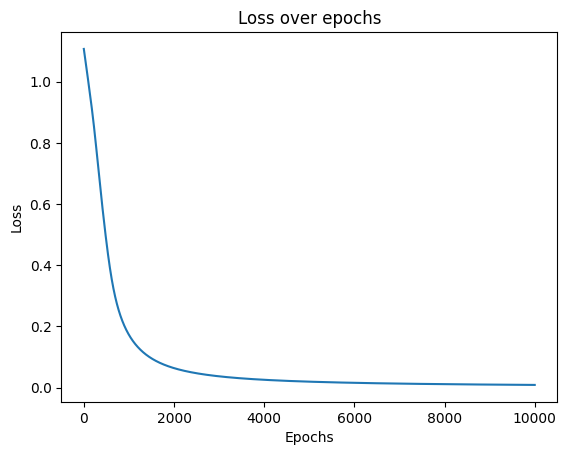

In [7]:
losses = []

# Huấn luyện mô hình
epochs = 10000
for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Lưu loss vào danh sách
    #code here
    losses.append(loss.item())
    
    optimizer.zero_grad() #code here
    loss.backward() #code here
    optimizer.step() #code here

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 6. Đánh giá mô hình
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)  # Lấy nhãn dự đoán
    accuracy = (predicted == y_test).float().mean()  # Tính độ chính xác
    print(f"Accuracy on test set: {accuracy.item():.4f}")

# Vẽ biểu đồ loss
#code here
# Vẽ biểu đồ loss
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

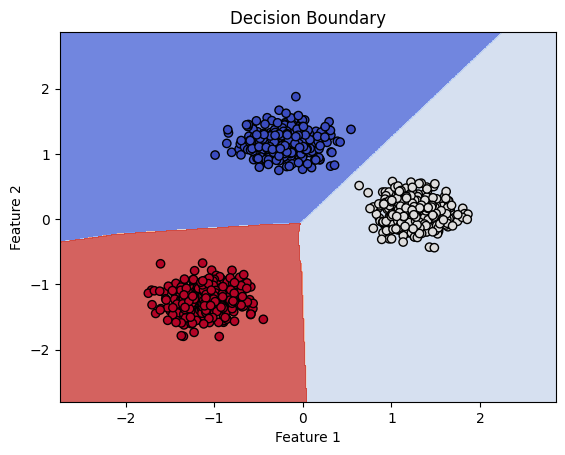

In [9]:
# 7. Vẽ quyết định ranh giới
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    
    with torch.no_grad():
        preds = model(grid_tensor)
        preds = torch.argmax(preds, axis=1).numpy()
    
    plt.contourf(xx, yy, preds.reshape(xx.shape), alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

#Ranh giới phân loại
plot_decision_boundary(model, np.vstack((X_train.numpy(), X_test.numpy())), np.hstack((y_train.numpy(), y_test.numpy())))